In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set()
from pylab import rcParams
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter

## Se importa el dataset
Se lee el dataset con read_excel, seleccionando la hoja "Data 1"
el dataset se puede encontrar en:


https://www.eia.gov/dnav/pet/pet_pri_gnd_dcus_nus_w.htm

In [65]:
df = pd.read_excel('PET_PRI_GND_DCUS_NUS_W.xls',header=2, sheet_name="Data 1", )
df.columns= ['Date', 'A1', 'A2', 'A3', 'R1', 'R2', 'R3', 'M1', 'M2', 'M3', 'P1', 'P2', 'P3', 'D1', 'D2', 'D3']
df.drop(labels=['D1','D2','D3'], axis=1, inplace=True)
df.head(5)

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3
0,1990-08-20,NaN,NaN,NaN,1.191,1.191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-08-27,NaN,NaN,NaN,1.245,1.245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-09-03,NaN,NaN,NaN,1.242,1.242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-09-10,NaN,NaN,NaN,1.252,1.252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-09-17,NaN,NaN,NaN,1.266,1.266,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Limpiar valores nulos
Se puede observar que hay muchos valores nulos, por lo que se va a comprobar con el metodo isnull y posteriormente se van a eliminar los registros con todos los valores nulos, ya que no todos los años registraban todos los campos.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1686 non-null   datetime64[ns]
 1   A1      1549 non-null   float64       
 2   A2      1463 non-null   float64       
 3   A3      1463 non-null   float64       
 4   R1      1680 non-null   float64       
 5   R2      1680 non-null   float64       
 6   R3      1463 non-null   float64       
 7   M1      1463 non-null   float64       
 8   M2      1463 non-null   float64       
 9   M3      1463 non-null   float64       
 10  P1      1463 non-null   float64       
 11  P2      1463 non-null   float64       
 12  P3      1463 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 171.4 KB


In [67]:
df.isnull().any()

Date    False
A1       True
A2       True
A3       True
R1       True
R2       True
R3       True
M1       True
M2       True
M3       True
P1       True
P2       True
P3       True
dtype: bool

In [68]:
df.dropna(inplace=True)
df.isnull().any()

Date    False
A1      False
A2      False
A3      False
R1      False
R2      False
R3      False
M1      False
M2      False
M3      False
P1      False
P2      False
P3      False
dtype: bool

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 223 to 1685
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1463 non-null   datetime64[ns]
 1   A1      1463 non-null   float64       
 2   A2      1463 non-null   float64       
 3   A3      1463 non-null   float64       
 4   R1      1463 non-null   float64       
 5   R2      1463 non-null   float64       
 6   R3      1463 non-null   float64       
 7   M1      1463 non-null   float64       
 8   M2      1463 non-null   float64       
 9   M3      1463 non-null   float64       
 10  P1      1463 non-null   float64       
 11  P2      1463 non-null   float64       
 12  P3      1463 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 160.0 KB


## Precio mas caro

Para darnos una idea de los precios vamos a tomar el registro con los valores mas altos y veremos la diferencia de precio entre grados

In [70]:
df.loc[-1] = df.max(axis=0) 

In [72]:
top_1 = df.tail(1)
top_1

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3
-1,2022-12-05,5.107,4.916,5.491,5.006,4.844,5.362,5.455,5.191,5.858,5.762,5.513,6.064


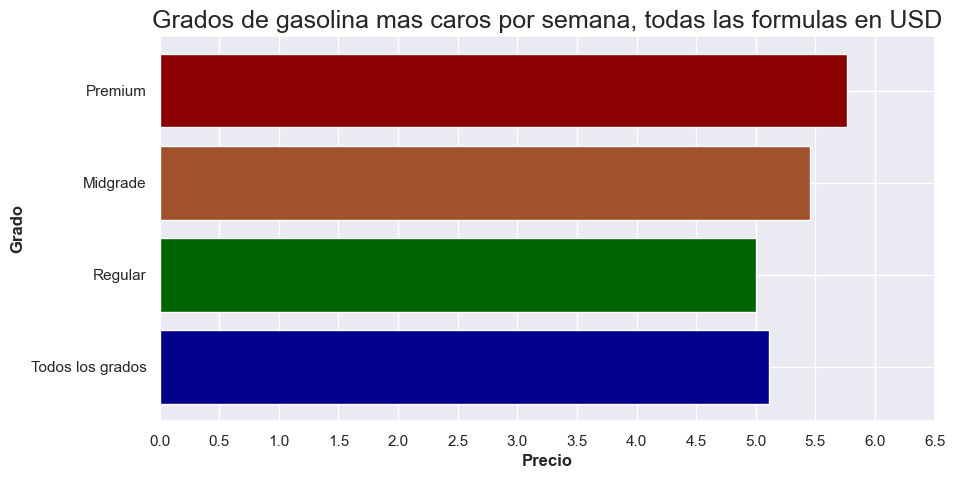

In [92]:
plt.figure(figsize= (10,5))
sns.set_style("darkgrid")
plt.barh('Todos los grados', top_1['A1'], color = 'darkblue')
plt.barh('Regular', top_1['R1'], color = 'darkgreen')
plt.barh('Midgrade', top_1['M1'], color = 'sienna')
plt.barh('Premium', top_1['P1'], color = 'darkred')
plt.xticks(np.arange(0, 7, step=0.5))
plt.title("Grados de gasolina mas caros por semana, todas las formulas en USD", fontsize = 18)
plt.ylabel('Grado', fontsize = 12, fontweight = 'bold')
plt.xlabel("Precio", fontsize = 12, fontweight = 'bold')
plt.show()

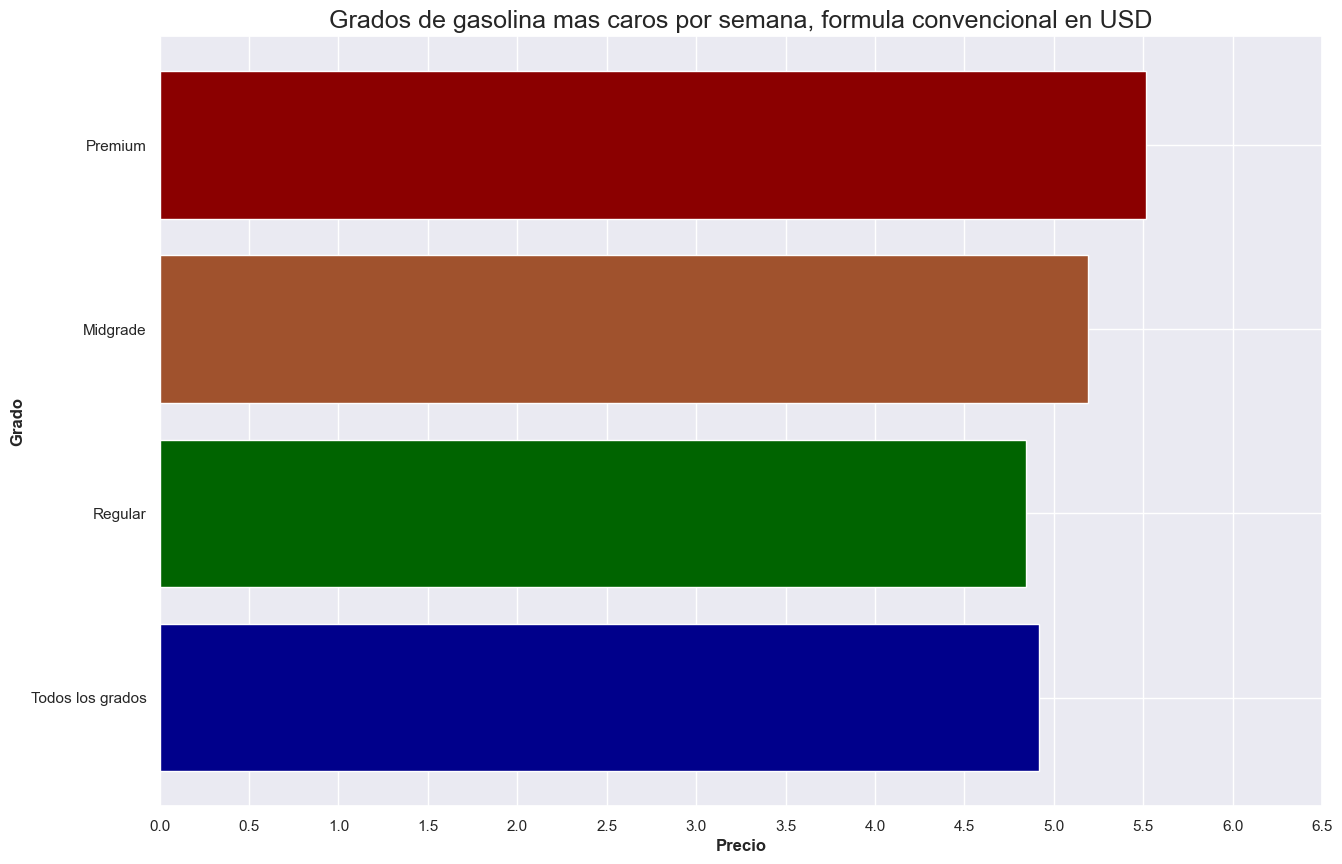

In [93]:
plt.figure(figsize= (15,10))
sns.set_style("darkgrid")
plt.barh('Todos los grados', top_1['A2'], color = 'darkblue')
plt.barh('Regular', top_1['R2'], color = 'darkgreen')
plt.barh('Midgrade', top_1['M2'], color = 'sienna')
plt.barh('Premium', top_1['P2'], color = 'darkred')
plt.xticks(np.arange(0, 7, step=0.5))
plt.title("Grados de gasolina mas caros por semana, formula convencional en USD", fontsize = 18)
plt.ylabel('Grado', fontsize = 12, fontweight = 'bold')
plt.xlabel("Precio", fontsize = 12, fontweight = 'bold')
plt.show()

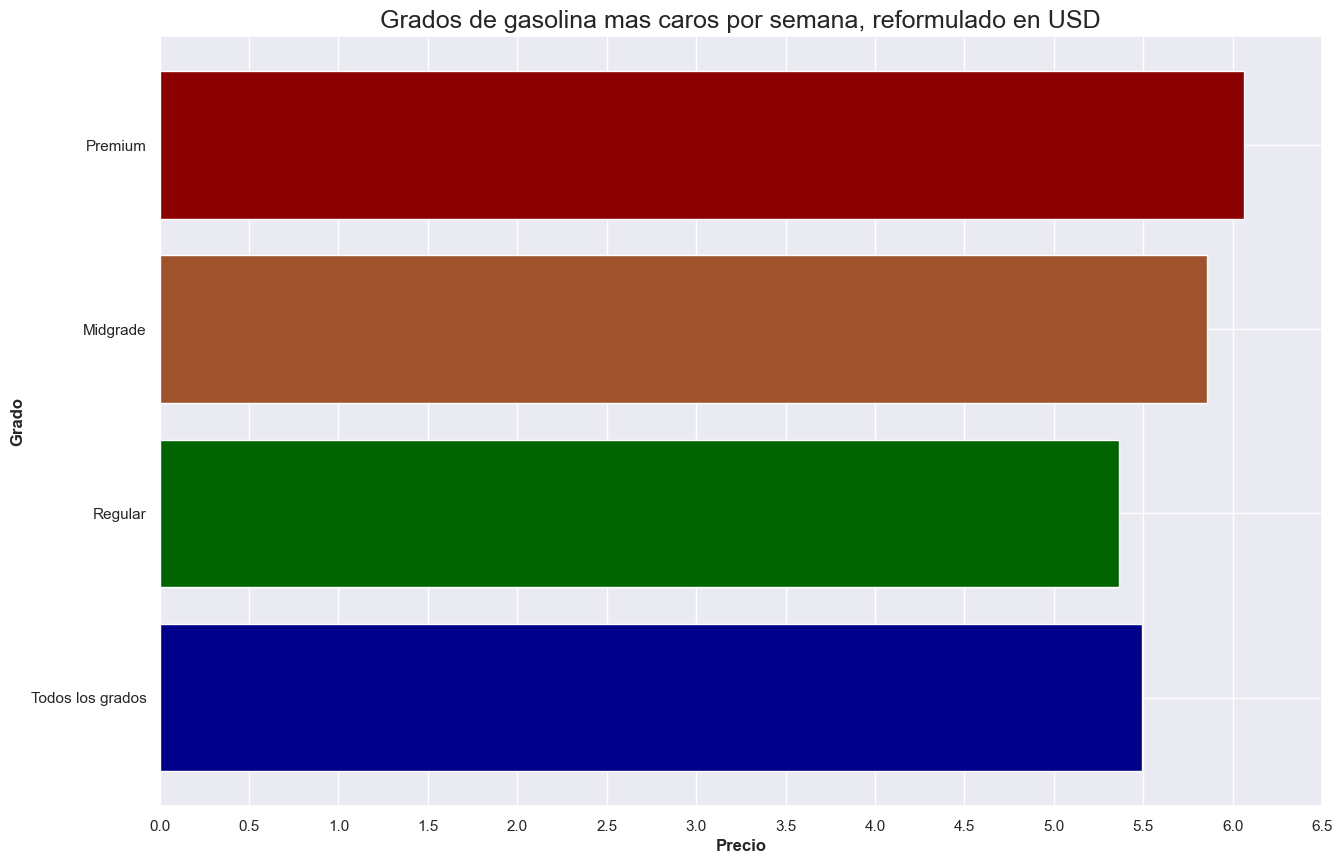

In [94]:
plt.figure(figsize= (15,10))
sns.set_style("darkgrid")
plt.barh('Todos los grados', top_1['A3'], color = 'darkblue')
plt.barh('Regular', top_1['R3'], color = 'darkgreen')
plt.barh('Midgrade', top_1['M3'], color = 'sienna')
plt.barh('Premium', top_1['P3'], color = 'darkred')
plt.xticks(np.arange(0, 7, step=0.5))
plt.title("Grados de gasolina mas caros por semana, reformulado en USD", fontsize = 18)
plt.ylabel('Grado', fontsize = 12, fontweight = 'bold')
plt.xlabel("Precio", fontsize = 12, fontweight = 'bold')
plt.show()

## Vamos a ver el precio promedio anual y el incremento año con año

In [101]:
dfYear = df
dfYear['year'] = pd.DatetimeIndex(dfYear['Date']).year
dfYear.drop(-1, inplace = True)
dfYear

KeyError: '[-1] not found in axis'